In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

strokedata = pd.read_csv('healthcare-dataset-stroke-data.csv')
strokedata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#helper functions

#variable transformations
def var_transform(data):
    duration_binned = pd.qcut(train['duration'], 8, retbins = True)
    bins = duration_binned[1]
    data['duration_binned'] = pd.cut(data['duration'], bins = bins)
    return data


#jitter the values
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)

def confusion_matrix_train(model,cutoff):
    # Confusion matrix
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    # Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    return cm_df, accuracy, tpr, precision
    
#Function to compute confusion matrix and prediction accuracy on test data
def confusion_matrix_test(data,actual_values,model,cutoff):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
#calculate accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    return cm_df, accuracy, tpr, precision

#plotting roc
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

# Creating test and training data frame

In [2]:
np.random.seed(2)
train = strokedata.sample(round(strokedata.shape[0]*0.7))
test = strokedata.drop(train.index)

Train data consists of [3577 rows x 12 columns]  and test data consists of [1533 rows x 12 columns]

In [3]:
ols_object = sm.ols(formula = 'stroke~avg_glucose_level+age*bmi', data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     58.14
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           1.50e-47
Time:                        13:50:20   Log-Likelihood:                 741.33
No. Observations:                3441   AIC:                            -1473.
Df Residuals:                    3436   BIC:                            -1442.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0148      0.026     -0.567      0.571      -0.066       0.036
avg_glucose_level     0.0003   7.82e-05      4.431      0.000       0.000       0.001
age                   0.0011      0.001      1.928      0.054   -1.95e-05       0.002
bmi                  -0.0026      0.001     -2.684      0.007      -0.004      -0.001
age:bmi            3.569e-05    2.2e-05      1.619      0.106   -7.53e-06    7.89e-05
==============================================================================
Omnibus:                     2842.794   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47050.166
Skew:                           4.092   Prob(JB):                         0.00
Kurtosis:                      19.162   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Examining the Distribution of the Target Column

In [4]:
train.stroke.value_counts()

0    3407
1     170
Name: stroke, dtype: int64

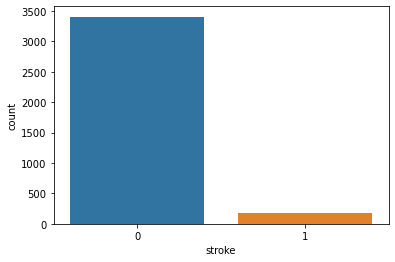

In [5]:
sns.countplot(x = 'stroke',data = train);

# Fitting the initial logistic regression model

Optimization terminated successfully.
         Current function value: 0.153034
         Iterations 9


<AxesSubplot:xlabel='age', ylabel='stroke'>

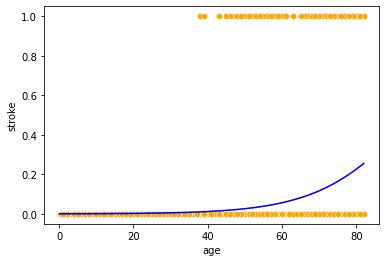

In [6]:
sns.scatterplot(x = 'age', y = 'stroke', data = train, color = 'orange')
logit_model = sm.logit(formula = 'stroke~age', data = train).fit()
sns.lineplot(x = 'age', y= logit_model.predict(train), data = train, color = 'blue')

In [7]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3577
Model:                          Logit   Df Residuals:                     3575
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                  0.1995
Time:                        13:50:22   Log-Likelihood:                -547.40
converged:                       True   LL-Null:                       -683.80
Covariance Type:            nonrobust   LLR p-value:                 2.803e-61
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.5734      0.429    -17.670      0.000      -8.413      -6.733
age            0.0793      0.006     12.711      0.000       0.067       0.092
==============================================================================
"""

In [10]:
(np.exp(0.0793)-1)*100

8.25290320710006

The coefficient of age is 0.0793, which means for a unit increase in age, the log odds of stroke likeliness increase by 0.0793, or the odds increases by 8.25%.

Assuming a significance level of $\alpha = 0.05$, age seems to be a staistically variable as its p-value and the model's overall LLR p-value are less than our $\alpha$ level.

Print out the correlations for each of the continuous variables to check for possible interactions.

In [14]:
corr_table = train.corr()
corr_table

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.014804,0.001437,0.005596,-0.029385,-0.003362,-0.004766
age,-0.014804,1.000000,0.272511,0.266071,0.226338,0.340309,0.248097
hypertension,0.001437,0.272511,1.000000,0.108822,0.169636,0.171667,0.117325
heart_disease,0.005596,0.266071,0.108822,1.000000,0.150224,0.049623,0.137965
avg_glucose_level,-0.029385,0.226338,0.169636,0.150224,1.000000,0.178433,0.116067
bmi,-0.003362,0.340309,0.171667,0.049623,0.178433,1.000000,0.046985
stroke,-0.004766,0.248097,0.117325,0.137965,0.116067,0.046985,1.000000


BMI and age have a correlations of 0.340309 that might be worth looking into as an interaction term. To test this, train a basic model using all of the continuous variables and then add in the interaction term.

In [17]:
# basic model with all the continuous vars
logit_model = sm.logit(formula = 'stroke~bmi+avg_glucose_level+age', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.140173
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3441
Model:                          Logit   Df Residuals:                     3437
Method:                           MLE   Df Model:                            3
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                  0.2017
Time:                        14:04:30   Log-Likelihood:                -482.33
converged:                       True   LL-Null:                       -604.20
Covariance Type:            nonrobust   LLR p-value:                 1.478e-52
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -8.3364      0.663    -12.579      0.000      -9.635      -7.037
bmi                   0.0099      0.014      0.711      0.477      -0.017       0.037
avg_glucose_level     0.0047      0.002      3.061      0.002       0.002       0.008
age                   0.0761      0.007     11.156      0.000       0.063       0.089
=====================================================================================
"""

BMI does not appear to be statistically significant in this model, to test for the interaction, add an interaction term between BMI and age.

In [19]:
logit_model = sm.logit(formula = 'stroke~bmi+I(bmi*age)+avg_glucose_level+age', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.139646
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3441
Model:                          Logit   Df Residuals:                     3436
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                  0.2047
Time:                        14:04:52   Log-Likelihood:                -480.52
converged:                       True   LL-Null:                       -604.20
Covariance Type:            nonrobust   LLR p-value:                 2.402e-52
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -11.0251      1.364     -8.082      0.000     -13.699      -8.351
bmi                   0.0970      0.039      2.501      0.012       0.021       0.173
I(bmi * age)         -0.0014      0.001     -2.238      0.025      -0.003      -0.000
avg_glucose_level     0.0049      0.002      3.237      0.001       0.002       0.008
age                   0.1192      0.021      5.704      0.000       0.078       0.160
=====================================================================================
"""